In [1]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-g0gnzzao
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-g0gnzzao
CPU times: user 203 ms, sys: 63.7 ms, total: 266 ms
Wall time: 21.4 s


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import collections

In [3]:
df = pd.read_csv('MO_State_Park_Bison_Locations.csv')

In [4]:
df[['Lat', 'Long']] = df.LatLon.str.split(" ", expand=True,)
df = df.drop(['LatLon'], axis=1)
lst = df.values.tolist()
for i in lst:
    i[6] = i[6][1:-1]
    i[-1] = i[-1][:-1]

In [5]:
df = pd.DataFrame(lst, columns = ['RecordID', 'GPSFixUnixTimeCST', 'ESN', 'Name', 'GPSFixDateTime', 'Moving', 'Lat', 'Long'])

In [6]:
df['Lat'] = df.Lat.apply(pd.to_numeric)
df['Long'] = df.Long.apply(pd.to_numeric)

In [7]:
df.head()

,RecordID,GPSFixUnixTimeCST,ESN,Name,GPSFixDateTime,Moving,Lat,Long
0,921992-1411305776,1411304479,921992,Miller Bison 1,9/21/2014 8:01,Y,37.532655,-94.568961
1,921992-1411316536,1411315239,921992,Miller Bison 1,9/21/2014 11:00,Y,37.534715,-94.561622
2,921992-1411320662,1411320640,921992,Miller Bison 1,9/21/2014 12:30,N,37.534736,-94.561622
3,921816-1411320663,1411320641,921816,Miller Bison 2,9/21/2014 12:30,N,37.534715,-94.561751
4,921992-1411326565,1411326040,921992,Miller Bison 1,9/21/2014 14:00,Y,37.534329,-94.554648


In [8]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))

In [9]:
gdf.head()

,RecordID,GPSFixUnixTimeCST,ESN,Name,GPSFixDateTime,Moving,Lat,Long,geometry
0,921992-1411305776,1411304479,921992,Miller Bison 1,9/21/2014 8:01,Y,37.532655,-94.568961,POINT (-94.56896 37.53265)
1,921992-1411316536,1411315239,921992,Miller Bison 1,9/21/2014 11:00,Y,37.534715,-94.561622,POINT (-94.56162 37.53472)
2,921992-1411320662,1411320640,921992,Miller Bison 1,9/21/2014 12:30,N,37.534736,-94.561622,POINT (-94.56162 37.53474)
3,921816-1411320663,1411320641,921816,Miller Bison 2,9/21/2014 12:30,N,37.534715,-94.561751,POINT (-94.56175 37.53472)
4,921992-1411326565,1411326040,921992,Miller Bison 1,9/21/2014 14:00,Y,37.534329,-94.554648,POINT (-94.55465 37.53433)


In [10]:
usa = gpd.read_file('states.shp')

In [11]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


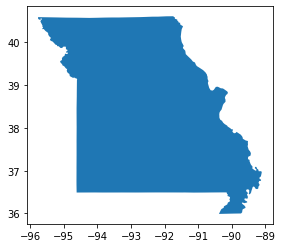

In [12]:
usa[usa.STATE_ABBR == 'MO'].plot()

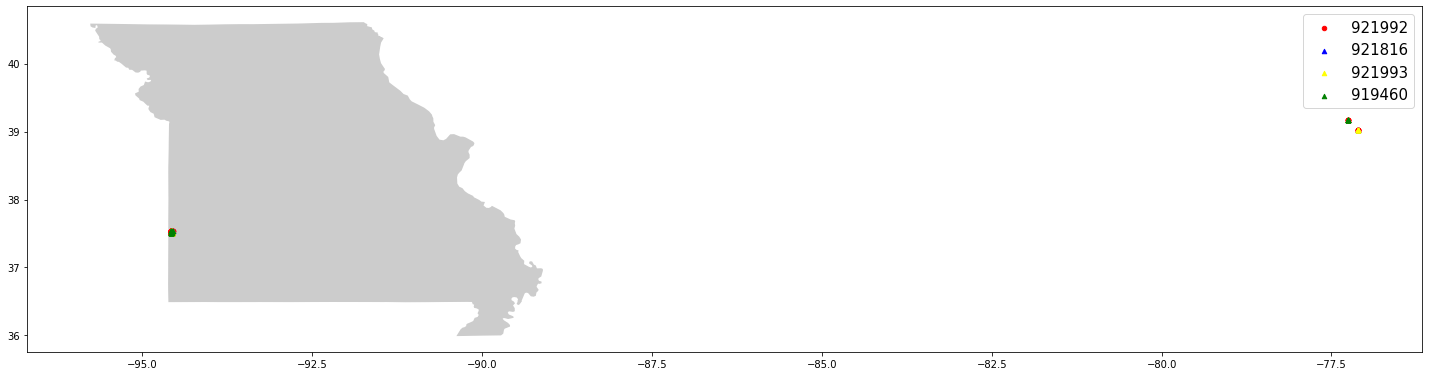

In [13]:
fig, ax = plt.subplots(figsize=(25, 25))
usa[usa.STATE_ABBR == 'MO'].plot(ax = ax, alpha = 0.4, color = 'grey')
gdf[gdf['ESN']==921992].plot(ax = ax, markersize = 20, color = 'red', marker='o', label='921992')
gdf[gdf['ESN']==921816].plot(ax = ax, markersize = 20, color = 'blue', marker='^', label='921816')
gdf[gdf['ESN']==921993].plot(ax = ax, markersize = 20, color = 'yellow', marker='^', label='921993')
gdf[gdf['ESN']==919460].plot(ax = ax, markersize = 20, color = 'green', marker='^', label='919460')
plt.legend(prop={'size':15})

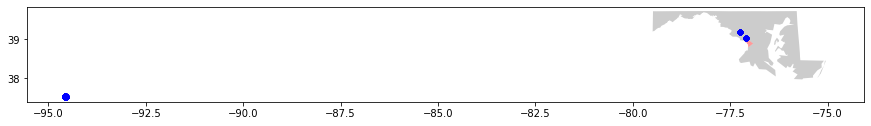

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
usa[usa.STATE_ABBR == 'MD'].plot(ax = ax, alpha = 0.4, color = 'grey')
usa[usa.STATE_ABBR == 'DC'].plot(ax = ax, alpha = 0.4, color = 'RED')
gdf.plot(ax = ax, markersize = 20, color = 'blue', marker='o')

In [15]:
df_2 = pd.read_csv('bison-Bison-SouthDakota.csv')

In [16]:
df_SD_location = df_2[['bisonID','eventDate', 'year', 'decimalLatitude', 'decimalLongitude']]

In [17]:
gdf_SD = gpd.GeoDataFrame(df_SD_location, geometry=gpd.points_from_xy(df_SD_location.decimalLongitude, df_SD_location.decimalLatitude))

In [18]:
bison_lst_SD = []
for i in gdf_SD.geometry:
    bison_lst_SD.append(i)

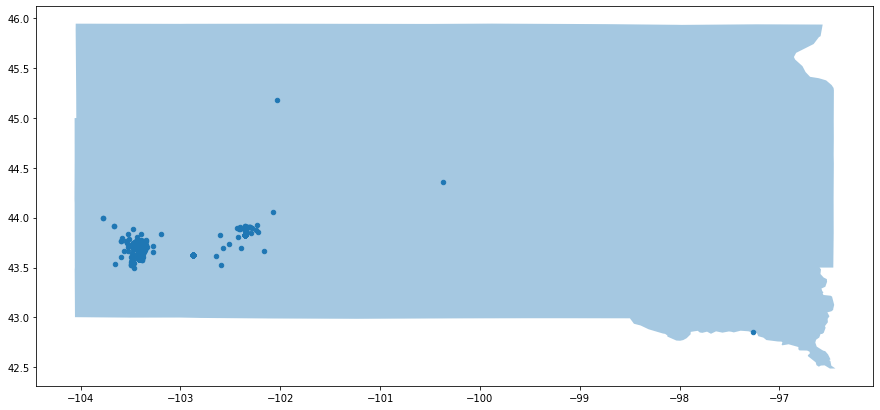

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
usa[usa.STATE_ABBR == 'SD'].plot(ax = ax, alpha = 0.4)
gdf_SD.plot(ax = ax, markersize = 20, marker='o')

In [20]:
df_weather_SD = pd.read_csv('ggweather_SD.csv')

In [21]:
df_weather_SD.head()

,Unnamed: 0,Location,State,ID,Latitude,Longitude,Elevation,Jan_max,Feb_max,Mar_max,Apr_max,May_max,Jun_max,Jul_max,Aug_max,Sep_max,Oct_max,Nov_max,Dec_max,Jan_min,Feb_min,Mar_min,Apr_min,May_min,Jun_min,Jul_min,Aug_min,Sep_min,Oct_min,Nov_min,Dec_min,Jan_Prec,Feb_Prec,Mar_Prec,Apr_Prec,May_Prec,Jun_Prec,Jul_Prec,Aug_Prec,Sep_Prec,Oct_Prec,Nov_Prec,Dec_Prec,Jan_Snow,Feb_Snow,Mar_Snow,Apr_Snow,May_Snow,Jun_Snow,Jul_Snow,Aug_Snow,Sep_Snow,Oct_Snow,Nov_Snow,Dec_Snow
0,0,ABERDEEN,SD,USW00014929,45.4558,-98.4131,396.8,23.7,28.6,41.7,57.6,70.4,80.2,84.9,82.9,74.9,59.3,42.5,28.7,1.9,6.3,19.4,31.4,44.3,55.1,59.7,56.5,46.8,33.3,19.4,7.9,0.55,0.62,0.89,1.91,3.28,3.76,3.09,2.24,1.99,2.14,0.74,0.61,7.8,8.6,6.3,4.2,0.0,0.0,0.0,0.0,0.0,1.3,6.5,8.0
1,1,ABERDEEN 1.0 NNE,SD,US1SDBR0001,45.4810,-98.4732,395.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.58,0.91,1.98,3.61,3.71,3.45,2.52,2.15,2.04,0.71,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,ABERDEEN 1.5 SSW,SD,US1SDBR0011,45.4468,-98.4909,396.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.64,0.97,2.02,3.44,3.83,3.30,2.48,2.22,2.12,0.71,0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,ABERDEEN 1.5 SW,SD,US1SDBR0038,45.4505,-98.5086,398.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53,0.59,0.93,2.03,3.65,3.78,3.19,2.31,2.21,2.00,0.71,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,ABERDEEN 3 E,SD,USC00390022,45.4553,-98.4142,396.5,20.7,25.2,38.9,54.3,67.7,77.5,82.7,80.7,72.3,57.1,39.7,26.1,1.6,6.2,18.9,31.6,44.5,55.2,59.6,57.1,47.6,33.5,19.6,8.1,0.50,0.59,0.93,1.93,3.37,3.68,3.38,2.38,2.16,2.09,0.74,0.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
gdf_weather_SD = gpd.GeoDataFrame(df_weather_SD, geometry=gpd.points_from_xy(df_weather_SD.Longitude, df_weather_SD.Latitude))

In [23]:
weather_lst_SD = []
for i in gdf_weather_SD.geometry:
    weather_lst_SD.append(i)

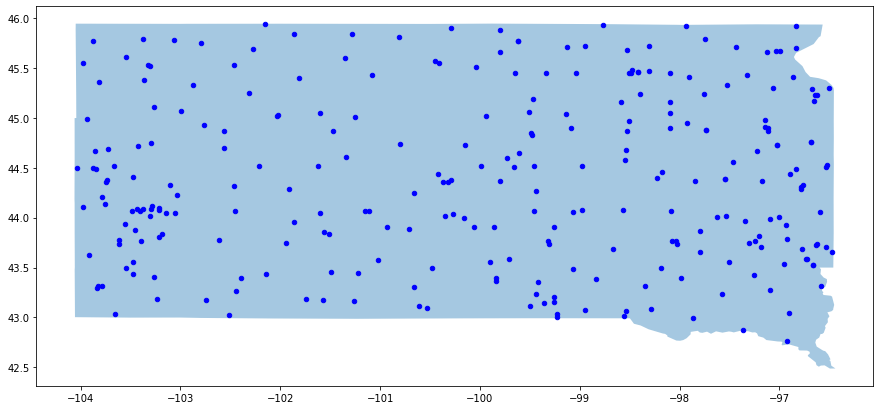

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
usa[usa.STATE_ABBR == 'SD'].plot(ax = ax, alpha = 0.4)
gdf_weather_SD.plot(ax = ax, markersize = 20, color = 'blue', marker='o')

In [25]:
lst_point = []
for i in bison_lst_SD:
    nearst = 50000
    for row_index, j in enumerate(weather_lst_SD):
        distance = np.sqrt((j.x - i.x)**2 + (j.y - i.y)**2)
        if distance < nearst:
            nearst = distance
            near_point = row_index

    lst_point.append(near_point)

In [26]:
collections.Counter(lst_point)

Counter({62: 1,
         63: 5,
         64: 78,
         65: 4,
         85: 1,
         89: 1,
         112: 1,
         113: 2,
         119: 2,
         124: 2,
         131: 1,
         142: 1,
         180: 2,
         208: 1,
         228: 2,
         257: 89,
         258: 1691,
         270: 695,
         275: 1})

In [27]:
# use 64, 270 and 258 
new_df = gdf_weather_SD.iloc[[64, 257, 258, 270],:]

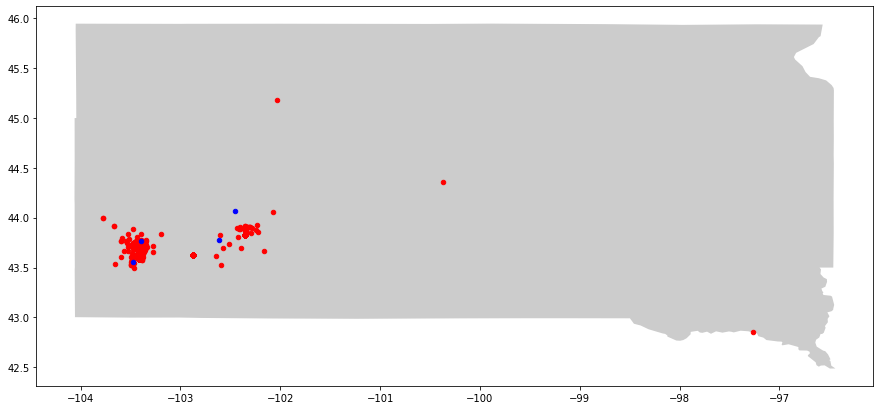

In [28]:
fig, ax = plt.subplots(figsize=(15, 15))
usa[usa.STATE_ABBR == 'SD'].plot(ax = ax, alpha = 0.4, color = 'gray')
gdf_SD.plot(ax = ax, markersize = 20, color = 'red', marker='o')
new_df.plot(ax = ax, markersize = 20, color = 'blue', marker='o')

In [29]:
new_df

,Unnamed: 0,Location,State,ID,Latitude,Longitude,Elevation,Jan_max,Feb_max,Mar_max,Apr_max,May_max,Jun_max,Jul_max,Aug_max,Sep_max,Oct_max,Nov_max,Dec_max,Jan_min,Feb_min,Mar_min,Apr_min,May_min,Jun_min,Jul_min,Aug_min,Sep_min,Oct_min,Nov_min,Dec_min,Jan_Prec,Feb_Prec,Mar_Prec,Apr_Prec,May_Prec,Jun_Prec,Jul_Prec,Aug_Prec,Sep_Prec,Oct_Prec,Nov_Prec,Dec_Prec,Jan_Snow,Feb_Snow,Mar_Snow,Apr_Snow,May_Snow,Jun_Snow,Jul_Snow,Aug_Snow,Sep_Snow,Oct_Snow,Nov_Snow,Dec_Snow,geometry
64,64,CUSTER 10.2 E,SD,US1SDCS0001,43.7708,-103.3964,1321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.59,1.05,2.40,4.23,3.55,3.39,2.27,1.76,1.51,0.53,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-103.39640 43.77080)
257,257,WASTA,SD,USC00398911,44.0681,-102.4497,709.6,35.1,39.0,50.2,60.1,69.7,80.4,89.0,88.3,79.1,63.1,49.0,37.4,9.4,12.6,22.2,32.6,43.5,53.9,60.1,58.0,47.3,33.6,21.0,11.7,0.28,0.53,0.87,1.90,3.55,2.73,2.32,1.56,1.19,1.76,0.64,0.32,3.8,6.4,5.5,3.7,0.1,0.0,0.0,0.0,0.0,1.1,4.2,5.6,POINT (-102.44970 44.06810)
258,258,WASTA 21.6 SSW,SD,US1SDPN0019,43.7810,-102.6168,894.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.54,1.17,2.55,3.36,2.69,2.33,2.39,1.47,2.01,0.68,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-102.61680 43.78100)
270,270,WIND CAVE,SD,USC00399347,43.5561,-103.4794,1266.4,39.7,40.7,50.0,57.7,66.4,77.4,84.7,83.6,76.2,61.4,48.4,39.4,14.8,15.5,23.7,30.9,40.9,50.1,56.6,54.9,46.2,34.0,23.4,15.4,0.45,0.70,1.07,2.32,3.74,3.29,3.01,2.30,1.53,1.55,0.71,0.53,6.3,7.1,9.6,7.8,0.9,0.0,0.0,0.0,0.2,2.1,4.4,7.5,POINT (-103.47940 43.55610)


In [30]:
# Average for 4 location
new_df_elevation = new_df.drop(new_df[new_df.Elevation == 0].index)
new_df_elevation[['Elevation']].mean()

Elevation    1047.75
dtype: float64

In [31]:
# Average for all location
df_elevation = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.Elevation == 0].index)
df_elevation[['Elevation']].mean()

Elevation    672.781227
dtype: float64

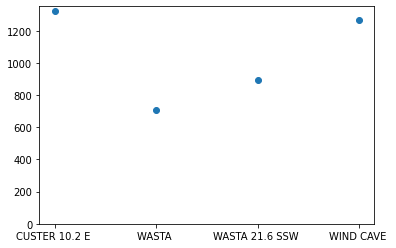

In [32]:
plt.scatter(new_df.Location, new_df.Elevation)
plt.ylim(ymin=0)
plt.show()

In [33]:
# Average for 4 location
new_df_max = new_df.drop(new_df[new_df.Aug_max == 0].index)
new_df_max[['Jan_max', 'Feb_max', 'Mar_max', 'Apr_max', 'May_max',
       'Jun_max', 'Jul_max', 'Aug_max', 'Sep_max', 'Oct_max', 'Nov_max',
       'Dec_max']].mean()

Jan_max    37.40
Feb_max    39.85
Mar_max    50.10
Apr_max    58.90
May_max    68.05
Jun_max    78.90
Jul_max    86.85
Aug_max    85.95
Sep_max    77.65
Oct_max    62.25
Nov_max    48.70
Dec_max    38.40
dtype: float64

In [34]:
# Average for all location
df_max = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.Aug_max == 0].index)
df_max[['Jan_max', 'Feb_max', 'Mar_max', 'Apr_max', 'May_max',
       'Jun_max', 'Jul_max', 'Aug_max', 'Sep_max', 'Oct_max', 'Nov_max',
       'Dec_max']].mean()

Jan_max    28.983234
Feb_max    32.864072
Mar_max    44.588024
Apr_max    56.836527
May_max    68.120958
Jun_max    78.421557
Jul_max    85.264072
Aug_max    83.783832
Sep_max    75.334731
Oct_max    59.814970
Nov_max    44.410778
Dec_max    32.271856
dtype: float64

<Figure size 1080x1080 with 0 Axes>

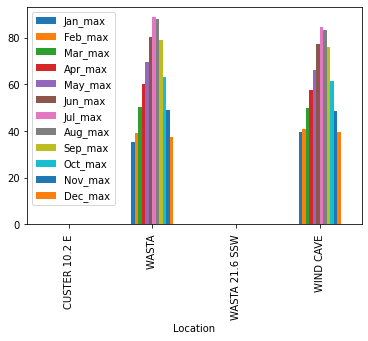

In [35]:
plt.figure(figsize=(15, 15))
new_df.plot(x="Location", y=['Jan_max', 'Feb_max', 'Mar_max', 'Apr_max', 'May_max',
       'Jun_max', 'Jul_max', 'Aug_max', 'Sep_max', 'Oct_max', 'Nov_max',
       'Dec_max'], kind="bar")
plt.show()

In [36]:
# Average for 4 location
new_df_min = new_df.drop(new_df[new_df.Aug_min == 0].index)
new_df_min[['Jan_min', 'Feb_min', 'Mar_min', 'Apr_min', 'May_min',
       'Jun_min', 'Jul_min', 'Aug_min', 'Sep_min', 'Oct_min', 'Nov_min',
       'Dec_min']].mean()

Jan_min    12.10
Feb_min    14.05
Mar_min    22.95
Apr_min    31.75
May_min    42.20
Jun_min    52.00
Jul_min    58.35
Aug_min    56.45
Sep_min    46.75
Oct_min    33.80
Nov_min    22.20
Dec_min    13.55
dtype: float64

In [37]:
# Average for all location
df_min = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.Aug_min == 0].index)
df_min[['Jan_min', 'Feb_min', 'Mar_min', 'Apr_min', 'May_min',
       'Jun_min', 'Jul_min', 'Aug_min', 'Sep_min', 'Oct_min', 'Nov_min',
       'Dec_min']].mean()

Jan_min     7.802994
Feb_min    10.848503
Mar_min    21.276048
Apr_min    31.773054
May_min    43.586228
Jun_min    54.122754
Jul_min    59.579641
Aug_min    57.257485
Sep_min    47.750299
Oct_min    34.471257
Nov_min    21.813174
Dec_min    11.800599
dtype: float64

<Figure size 1080x1080 with 0 Axes>

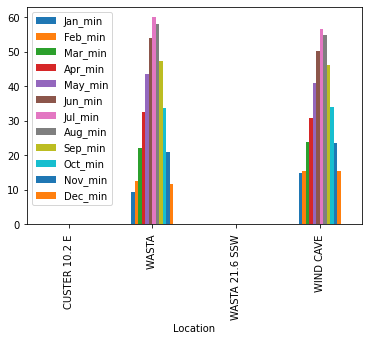

In [38]:
plt.figure(figsize=(15, 15))
new_df.plot(x="Location", y=['Jan_min', 'Feb_min', 'Mar_min', 'Apr_min', 'May_min',
       'Jun_min', 'Jul_min', 'Aug_min', 'Sep_min', 'Oct_min', 'Nov_min',
       'Dec_min'], kind="bar")
plt.show()

In [39]:
# Average for 4 location
new_df_prec = new_df.drop(new_df[new_df.May_Prec == 0].index)
new_df_prec[['Jan_Prec', 'Feb_Prec', 'Mar_Prec', 'Apr_Prec', 'May_Prec',
       'Jun_Prec', 'Jul_Prec', 'Aug_Prec', 'Sep_Prec', 'Oct_Prec', 'Nov_Prec',
       'Dec_Prec']].mean()

Jan_Prec    0.3925
Feb_Prec    0.5900
Mar_Prec    1.0400
Apr_Prec    2.2925
May_Prec    3.7200
Jun_Prec    3.0650
Jul_Prec    2.7625
Aug_Prec    2.1300
Sep_Prec    1.4875
Oct_Prec    1.7075
Nov_Prec    0.6400
Dec_Prec    0.4200
dtype: float64

In [40]:
# Average for all location
df_prec = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.May_Prec == 0].index)
df_prec[['Jan_Prec', 'Feb_Prec', 'Mar_Prec', 'Apr_Prec', 'May_Prec',
       'Jun_Prec', 'Jul_Prec', 'Aug_Prec', 'Sep_Prec', 'Oct_Prec', 'Nov_Prec',
       'Dec_Prec']].mean()

Jan_Prec    0.505856
Feb_Prec    0.662510
Mar_Prec    1.080684
Apr_Prec    2.283650
May_Prec    3.416730
Jun_Prec    3.681787
Jul_Prec    2.980646
Aug_Prec    2.493498
Sep_Prec    2.075703
Oct_Prec    1.885627
Nov_Prec    0.748745
Dec_Prec    0.614715
dtype: float64

<Figure size 1080x1080 with 0 Axes>

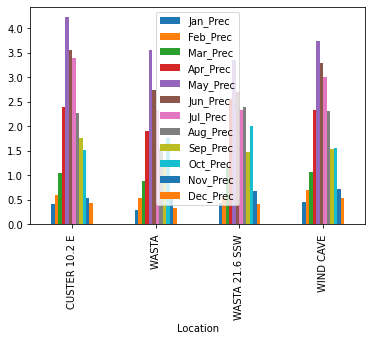

In [41]:
plt.figure(figsize=(15, 15))
new_df.plot(x="Location", y=['Jan_Prec', 'Feb_Prec', 'Mar_Prec', 'Apr_Prec', 'May_Prec',
       'Jun_Prec', 'Jul_Prec', 'Aug_Prec', 'Sep_Prec', 'Oct_Prec', 'Nov_Prec',
       'Dec_Prec'], kind="bar")
plt.show()

In [42]:
# Average for 4 location
new_df_snow = new_df.drop(new_df[new_df.Jan_Snow == 0].index)
new_df_snow = new_df_snow.drop(new_df_snow[new_df_snow.Jan_Snow == 0].index)
new_df_snow[['Jan_Snow', 'Feb_Snow', 'Mar_Snow', 'Apr_Snow', 'May_Snow',
       'Jun_Snow', 'Jul_Snow', 'Aug_Snow', 'Sep_Snow', 'Oct_Snow', 'Nov_Snow',
       'Dec_Snow']].mean()

Jan_Snow    5.05
Feb_Snow    6.75
Mar_Snow    7.55
Apr_Snow    5.75
May_Snow    0.50
Jun_Snow    0.00
Jul_Snow    0.00
Aug_Snow    0.00
Sep_Snow    0.10
Oct_Snow    1.60
Nov_Snow    4.30
Dec_Snow    6.55
dtype: float64

In [43]:
# Average for all location
df_snow = gdf_weather_SD.drop(gdf_weather_SD[gdf_weather_SD.Jan_Snow == 0].index)
df_snow = df_snow.drop(df_snow[df_snow.Dec_Snow == 0].index)
df_snow[['Jan_Snow', 'Feb_Snow', 'Mar_Snow', 'Apr_Snow', 'May_Snow',
       'Jun_Snow', 'Jul_Snow', 'Aug_Snow', 'Sep_Snow', 'Oct_Snow', 'Nov_Snow',
       'Dec_Snow']].mean()

Jan_Snow    6.506522
Feb_Snow    7.960145
Mar_Snow    6.852174
Apr_Snow    6.013768
May_Snow    0.546377
Jun_Snow    0.012319
Jul_Snow    0.000000
Aug_Snow    0.000000
Sep_Snow    0.059420
Oct_Snow    2.054348
Nov_Snow    5.081159
Dec_Snow    7.958696
dtype: float64

<Figure size 1080x1080 with 0 Axes>

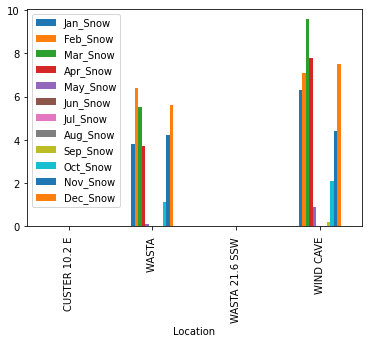

In [44]:
plt.figure(figsize=(15, 15))
new_df.plot(x="Location", y=['Jan_Snow', 'Feb_Snow', 'Mar_Snow', 'Apr_Snow', 'May_Snow',
       'Jun_Snow', 'Jul_Snow', 'Aug_Snow', 'Sep_Snow', 'Oct_Snow', 'Nov_Snow',
       'Dec_Snow'], kind="bar")
plt.show()